# Business Understanding

Syriatel is telecommunications company that has concerns regarding churn rate. Using the dataset provided, features shall be investigated to determine if there are predictable patterns that are related to our concern.

## The Problem

This dataset shows that there is a ~14.5% customer churn rate. An decent churn rate is 5-7% annually. This means we have some work to do.

## The Solution
This shall require classification machine learning models to identify what features contribute to the `churn` rate.

Providing a quality service and customer service is part of supporting a company's mission statement. Client retention is a factor that may lead to a consistent, predictable profit if referralls and other profit sources are not included. To stay relevant compared to your competitors, it's important to up to date to your company's data so you can calculate what contributes to a successful quarter and/or year and conduct research how to be ahead of your competitor.

Here are 2 main questions my classification model may be able to answer:
- What is the relationship between churn and other features?
- Which features increase the likelihood of churn?

In [2]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler,OneHotEncoder
from sklearn.inspection import permutation_importance
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import pipeline

from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, recall_score, get_scorer, f1_score, roc_auc_score, roc_curve, precision_score, auc, recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import CountVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier, plot_tree 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.preprocessing import OneHotEncoder


# Data Understanding

In [3]:
cc = pd.read_csv('data.csv')
cc

state  account length  area code phone number international plan  \
0       KS             128        415     382-4657                 no   
1       OH             107        415     371-7191                 no   
2       NJ             137        415     358-1921                 no   
3       OH              84        408     375-9999                yes   
4       OK              75        415     330-6626                yes   
...    ...             ...        ...          ...                ...   
3328    AZ             192        415     414-4276                 no   
3329    WV              68        415     370-3271                 no   
3330    RI              28        510     328-8230                 no   
3331    CT             184        510     364-6381                yes   
3332    TN              74        415     400-4344                 no   

     voice mail plan  number vmail messages  total day minutes  \
0                yes                     25              265.1   
1                yes                     26              161.6   
2                 no                      0              243.4   
3                 no                      0              299.4   
4                 no                      0              166.7   
...              ...                    ...                ...   
3328             yes                     36              156.2   
3329              no                      0              231.1   
3330              no                      0              180.8   
3331              no                      0              213.8   
3332             yes                     25              234.4   

      total day calls  total day charge  ...  total eve calls  \
0                 110             45.07  ...               99   
1                 123             27.47  ...              103   
2                 114             41.38  ...              110   
3                  71             50.90  ...               88   
4                 113             28.34  ...              122   
...               ...               ...  ...              ...   
3328               77             26.55  ...              126   
3329               57             39.29  ...               55   
3330              109             30.74  ...               58   
3331              105             36.35  ...               84   
3332              113             39.85  ...               82   

      total eve charge  total night minutes  total night calls  \
0                16.78                244.7                 91   
1                16.62                254.4                103   
2                10.30                162.6                104   
3                 5.26                196.9                 89   
4                12.61                186.9                121   
...                ...                  ...                ...   
3328             18.32                279.1                 83   
3329             13.04                191.3                123   
3330             24.55                191.9                 91   
3331             13.57                139.2                137   
3332             22.60                241.4                 77   

      total night charge  total intl minutes  total intl calls  \
0                  11.01                10.0                 3   
1                  11.45                13.7                 3   
2                   7.32                12.2                 5   
3                   8.86                 6.6                 7   
4                   8.41                10.1                 3   
...                  ...                 ...               ...   
3328               12.56                 9.9                 6   
3329                8.61                 9.6                 4   
3330                8.64                14.1                 6   
3331                6.26                 5.0                10   
3332               10.86           

In [4]:
cc.rename(columns={'account length':'account_length', 'area code': 'area_code', 'phone number': 'phone_number', 'international plan': 'intl_plan', 'voice mail plan': 'vmail_plan', 'number vmail messages': 'qty_vmails', 'total day minutes':'sum_day_mins','total day calls':'sum_day_calls', 'total day charge':'total_day_charge', 'total eve minutes':'sum_eve_mins', 'total eve calls': 'sum_eve_calls', 'total eve charge': 'total_eve_charge', 'total night minutes':'sum_night_mins', 'total night calls':'sum_night_calls', 'total night charge': 'total_night_charge', 'total intl minutes':'sum_intl_mins', 'total intl calls': 'sum_intl_calls', 'total intl charge': 'total_intl_charge', 'customer service calls': 'cust_serv_calls'}, inplace = True)


In [5]:
# the phone number & area code columns was dropped since it was an irrevalant column
cc = cc.drop(labels=['phone_number', 'area_code'], axis = 1)

In [6]:
cc.dtypes

state                  object
account_length          int64
intl_plan              object
vmail_plan             object
qty_vmails              int64
sum_day_mins          float64
sum_day_calls           int64
total_day_charge      float64
sum_eve_mins          float64
sum_eve_calls           int64
total_eve_charge      float64
sum_night_mins        float64
sum_night_calls         int64
total_night_charge    float64
sum_intl_mins         float64
sum_intl_calls          int64
total_intl_charge     float64
cust_serv_calls         int64
churn                    bool
dtype: object

In [7]:
cc.isnull().sum().sum()

0

As you can see, there are no columns with null values as we can see so far. It is unknown if there are hidden null values. 

The majority of the features are numeric except for `state`, `phone number`, `international plan` and `voice mail plan` which are strings and our target (y) `churn` which is a boolean type.

In [8]:
for col in cc.columns:
    print(f"{col} vals:  {cc[col].unique()} \n")

state vals:  ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND'] 

account_length vals:  [128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21 133 224  58  11 109 102 165  18  30 176  47 190 152
  26  69 186 171  28 153 169  13  27   3  42 1

# Modeless Baseline: Churn

In [9]:
cc['churn'].value_counts(normalize=True)

False    0.855086
True     0.144914
Name: churn, dtype: float64

Around 15% of customers seem to leave with the business after a year.

## Let's explore categorical data!

`'churn'`, `'intl_plan2'`, `'vmail_plan'`

`Churners` have a longer **account length** than `non-churners`.

In [10]:
print(cc.groupby('churn')['cust_serv_calls'].mean())

churn
False    1.449825
True     2.229814
Name: cust_serv_calls, dtype: float64


`Churners` make more **customer service calls** than `non-churners`.

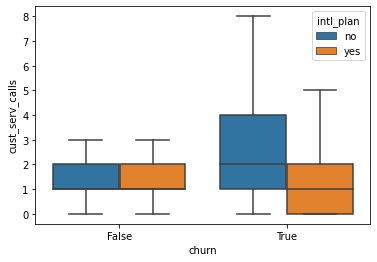

In [11]:
sns.boxplot(x = 'churn',
            y = 'cust_serv_calls',
            data = cc,
            sym = "",                  
            hue = 'intl_plan') 
# Display the plot
plt.show()

This boxplot shows that people who `churn` leave more customer services calls. In addition, customers that have an **international plan** leave less customer service calls.

# State Feature

This feature shall be analyzed so we can observe analytics then we shall convert `state` values to `0`, `1` using one-hot encoder.

In [12]:
# Count the number of churners and non-churners by State
print(cc.groupby('state')['churn'].value_counts())

state  churn
AK     False    49
       True      3
AL     False    72
       True      8
AR     False    44
                ..
WI     True      7
WV     False    96
       True     10
WY     False    68
       True      9
Name: churn, Length: 102, dtype: int64


In [13]:
cc['state'].value_counts(ascending=True)

CA     34
IA     44
PA     45
LA     51
AK     52
TN     53
HI     53
GA     54
DC     54
AR     55
NH     56
IL     58
KY     59
SD     60
SC     60
NE     61
OK     61
DE     61
ME     62
ND     62
NM     62
MO     63
FL     63
AZ     64
RI     65
MS     65
MA     65
CO     66
NV     66
WA     66
MT     68
NC     68
NJ     68
MD     70
KS     70
IN     71
TX     72
UT     72
MI     73
VT     73
ID     73
CT     74
WY     77
VA     77
OH     78
OR     78
WI     78
AL     80
NY     83
MN     84
WV    106
Name: state, dtype: int64

One of my biggest concerns about looking into states in that are factors that can **increase** the number of `churners` such as population, service quality, local providers in the area, etc.

- For example, California has the lowest number of `churn` and when compared to West Virginia which has the highest number. This is important to note because California is one of the biggest states in the country and it has a larger population.

# Data Preparation

To aid in the in the **data preparation**, columns with catgeorical information such as churn, internation plan, and voicemail plan were converted to 0 & 1.

In [14]:
cc['inter_plan2'] = cc['intl_plan'].map(lambda x:1 if x == 'yes' else 0)
cc

state  account_length intl_plan vmail_plan  qty_vmails  sum_day_mins  \
0       KS             128        no        yes          25         265.1   
1       OH             107        no        yes          26         161.6   
2       NJ             137        no         no           0         243.4   
3       OH              84       yes         no           0         299.4   
4       OK              75       yes         no           0         166.7   
...    ...             ...       ...        ...         ...           ...   
3328    AZ             192        no        yes          36         156.2   
3329    WV              68        no         no           0         231.1   
3330    RI              28        no         no           0         180.8   
3331    CT             184       yes         no           0         213.8   
3332    TN              74        no        yes          25         234.4   

      sum_day_calls  total_day_charge  sum_eve_mins  sum_eve_calls  \
0               110             45.07         197.4             99   
1               123             27.47         195.5            103   
2               114             41.38         121.2            110   
3                71             50.90          61.9             88   
4               113             28.34         148.3            122   
...             ...               ...           ...            ...   
3328             77             26.55         215.5            126   
3329             57             39.29         153.4             55   
3330            109             30.74         288.8             58   
3331            105             36.35         159.6             84   
3332            113             39.85         265.9             82   

      total_eve_charge  sum_night_mins  sum_night_calls  total_night_charge  \
0                16.78           244.7               91               11.01   
1                16.62           254.4              103               11.45   
2                10.30           162.6              104                7.32   
3                 5.26           196.9               89                8.86   
4                12.61           186.9              121                8.41   
...                ...             ...              ...                 ...   
3328             18.32           279.1               83               12.56   
3329             13.04           191.3              123                8.61   
3330             24.55           191.9               91                8.64   
3331             13.57           139.2              137                6.26   
3332             22.60           241.4               77               10.86   

      sum_intl_mins  sum_intl_calls  total_intl_charge  cust_serv_calls  \
0              10.0               3               2.70                1   
1              13.7               3               3.70                1   
2              12.2               5               3.29                0   
3               6.6               7               1.78                2   
4              10.1               3               2.73                3   
...             ...             ...                ...              ...   
3328            9.9               6               2.67                2   
3329            9.6               4               2.59                3   
3330           14.1               6               3.81                2   
3331            5.0              10               1.35                2   
3332           13.7               4               3.70                0   

      churn  inter_plan2  
0     False            0  
1     False            0  
2     False            0  
3     False            1  
4     False            1  
...     ...          ...  
3328  False            0  
3329  False            0  
3330  False            0  
3331  False            1  
3332  False            0  

[3333 rows x 20 columns]

In [15]:
cc['voicemail_plan2'] = cc['vmail_plan'].map(lambda x:1 if x == 'yes' else 0)
cc

state  account_length intl_plan vmail_plan  qty_vmails  sum_day_mins  \
0       KS             128        no        yes          25         265.1   
1       OH             107        no        yes          26         161.6   
2       NJ             137        no         no           0         243.4   
3       OH              84       yes         no           0         299.4   
4       OK              75       yes         no           0         166.7   
...    ...             ...       ...        ...         ...           ...   
3328    AZ             192        no        yes          36         156.2   
3329    WV              68        no         no           0         231.1   
3330    RI              28        no         no           0         180.8   
3331    CT             184       yes         no           0         213.8   
3332    TN              74        no        yes          25         234.4   

      sum_day_calls  total_day_charge  sum_eve_mins  sum_eve_calls  ...  \
0               110             45.07         197.4             99  ...   
1               123             27.47         195.5            103  ...   
2               114             41.38         121.2            110  ...   
3                71             50.90          61.9             88  ...   
4               113             28.34         148.3            122  ...   
...             ...               ...           ...            ...  ...   
3328             77             26.55         215.5            126  ...   
3329             57             39.29         153.4             55  ...   
3330            109             30.74         288.8             58  ...   
3331            105             36.35         159.6             84  ...   
3332            113             39.85         265.9             82  ...   

      sum_night_mins  sum_night_calls  total_night_charge  sum_intl_mins  \
0              244.7               91               11.01           10.0   
1              254.4              103               11.45           13.7   
2              162.6              104                7.32           12.2   
3              196.9               89                8.86            6.6   
4              186.9              121                8.41           10.1   
...              ...              ...                 ...            ...   
3328           279.1               83               12.56            9.9   
3329           191.3              123                8.61            9.6   
3330           191.9               91                8.64           14.1   
3331           139.2              137                6.26            5.0   
3332           241.4               77               10.86           13.7   

      sum_intl_calls  total_intl_charge  cust_serv_calls  churn  inter_plan2  \
0                  3               2.70                1  False            0   
1                  3               3.70                1  False            0   
2                  5               3.29                0  False            0   
3                  7               1.78                2  False            1   
4                  3               2.73                3  False            1   
...              ...                ...              ...    ...          ...   
3328               6               2.67                2  False            0   
3329               4               2.59                3  False            0   
3330               6               3.81                2  False            0   
3331              10               1.35                2  False            1   
3332               4               3.70                0  False            0   

      voicemail_plan2  
0                   1  
1                   1  
2                   0  
3                   0  
4                   0  
...               ...  
3328                1  
3329                0  
3330                0  
3331                0  
3332                1  

[3333 rows x 21 

In [16]:
cc['churn_2'] = cc['churn'].map(lambda x:1 if x == True else 0)
cc

state  account_length intl_plan vmail_plan  qty_vmails  sum_day_mins  \
0       KS             128        no        yes          25         265.1   
1       OH             107        no        yes          26         161.6   
2       NJ             137        no         no           0         243.4   
3       OH              84       yes         no           0         299.4   
4       OK              75       yes         no           0         166.7   
...    ...             ...       ...        ...         ...           ...   
3328    AZ             192        no        yes          36         156.2   
3329    WV              68        no         no           0         231.1   
3330    RI              28        no         no           0         180.8   
3331    CT             184       yes         no           0         213.8   
3332    TN              74        no        yes          25         234.4   

      sum_day_calls  total_day_charge  sum_eve_mins  sum_eve_calls  ...  \
0               110             45.07         197.4             99  ...   
1               123             27.47         195.5            103  ...   
2               114             41.38         121.2            110  ...   
3                71             50.90          61.9             88  ...   
4               113             28.34         148.3            122  ...   
...             ...               ...           ...            ...  ...   
3328             77             26.55         215.5            126  ...   
3329             57             39.29         153.4             55  ...   
3330            109             30.74         288.8             58  ...   
3331            105             36.35         159.6             84  ...   
3332            113             39.85         265.9             82  ...   

      sum_night_calls  total_night_charge  sum_intl_mins  sum_intl_calls  \
0                  91               11.01           10.0               3   
1                 103               11.45           13.7               3   
2                 104                7.32           12.2               5   
3                  89                8.86            6.6               7   
4                 121                8.41           10.1               3   
...               ...                 ...            ...             ...   
3328               83               12.56            9.9               6   
3329              123                8.61            9.6               4   
3330               91                8.64           14.1               6   
3331              137                6.26            5.0              10   
3332               77               10.86           13.7               4   

      total_intl_charge  cust_serv_calls  churn  inter_plan2  voicemail_plan2  \
0                  2.70                1  False            0                1   
1                  3.70                1  False            0                1   
2                  3.29                0  False            0                0   
3                  1.78                2  False            1                0   
4                  2.73                3  False            1                0   
...                 ...              ...    ...          ...              ...   
3328               2.67                2  False            0                1   
3329               2.59                3  False            0                0   
3330               3.81                2  False            0                0   
3331               1.35                2  False            1                0   
3332               3.70                0  False            0                1   

      churn_2  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
3328        0  
3329        0  
3330        0  
3331        0  
3332        0  

[3333 rows x 22 columns]

In [17]:
cc['churn_2'].value_counts()

0    2850
1     483
Name: churn_2, dtype: int64

In [18]:
cc = cc.drop(labels=['churn', 'intl_plan', 'vmail_plan'], axis = 1)
cc

state  account_length  qty_vmails  sum_day_mins  sum_day_calls  \
0       KS             128          25         265.1            110   
1       OH             107          26         161.6            123   
2       NJ             137           0         243.4            114   
3       OH              84           0         299.4             71   
4       OK              75           0         166.7            113   
...    ...             ...         ...           ...            ...   
3328    AZ             192          36         156.2             77   
3329    WV              68           0         231.1             57   
3330    RI              28           0         180.8            109   
3331    CT             184           0         213.8            105   
3332    TN              74          25         234.4            113   

      total_day_charge  sum_eve_mins  sum_eve_calls  total_eve_charge  \
0                45.07         197.4             99             16.78   
1                27.47         195.5            103             16.62   
2                41.38         121.2            110             10.30   
3                50.90          61.9             88              5.26   
4                28.34         148.3            122             12.61   
...                ...           ...            ...               ...   
3328             26.55         215.5            126             18.32   
3329             39.29         153.4             55             13.04   
3330             30.74         288.8             58             24.55   
3331             36.35         159.6             84             13.57   
3332             39.85         265.9             82             22.60   

      sum_night_mins  sum_night_calls  total_night_charge  sum_intl_mins  \
0              244.7               91               11.01           10.0   
1              254.4              103               11.45           13.7   
2              162.6              104                7.32           12.2   
3              196.9               89                8.86            6.6   
4              186.9              121                8.41           10.1   
...              ...              ...                 ...            ...   
3328           279.1               83               12.56            9.9   
3329           191.3              123                8.61            9.6   
3330           191.9               91                8.64           14.1   
3331           139.2              137                6.26            5.0   
3332           241.4               77               10.86           13.7   

      sum_intl_calls  total_intl_charge  cust_serv_calls  inter_plan2  \
0                  3               2.70                1            0   
1                  3               3.70                1            0   
2                  5               3.29                0            0   
3                  7               1.78                2            1   
4                  3               2.73                3            1   
...              ...                ...              ...          ...   
3328               6               2.67                2            0   
3329               4               2.59                3            0   
3330               6               3.81                2            0   
3331              10               1.35                2            1   
3332               4               3.70                0            0   

      voicemail_plan2  churn_2  
0                   1        0  
1                   1        0  
2                   0        0  
3                   0        0  
4                   0        0  
...               ...      ...  
3328                1        0  
3329                0        0  
3330                0        0  
3331                0        0  
3332                1        0  

[3333 rows x 19 columns]

## New Dataframe for Numeric Columns

In [19]:
num_cols = cc[['account_length', 'qty_vmails', 'sum_day_mins','sum_day_calls', 'total_day_charge', 'sum_eve_mins', 'sum_eve_calls', 'total_eve_charge', 'sum_night_mins', 'sum_night_calls', 'total_night_charge', 'sum_intl_mins', 'sum_intl_calls', 'total_intl_charge', 'cust_serv_calls']]
cat_columns = cc[['churn_2', 'inter_plan2', 'voicemail_plan2']]

Let's visualize the relationship in this dataset.

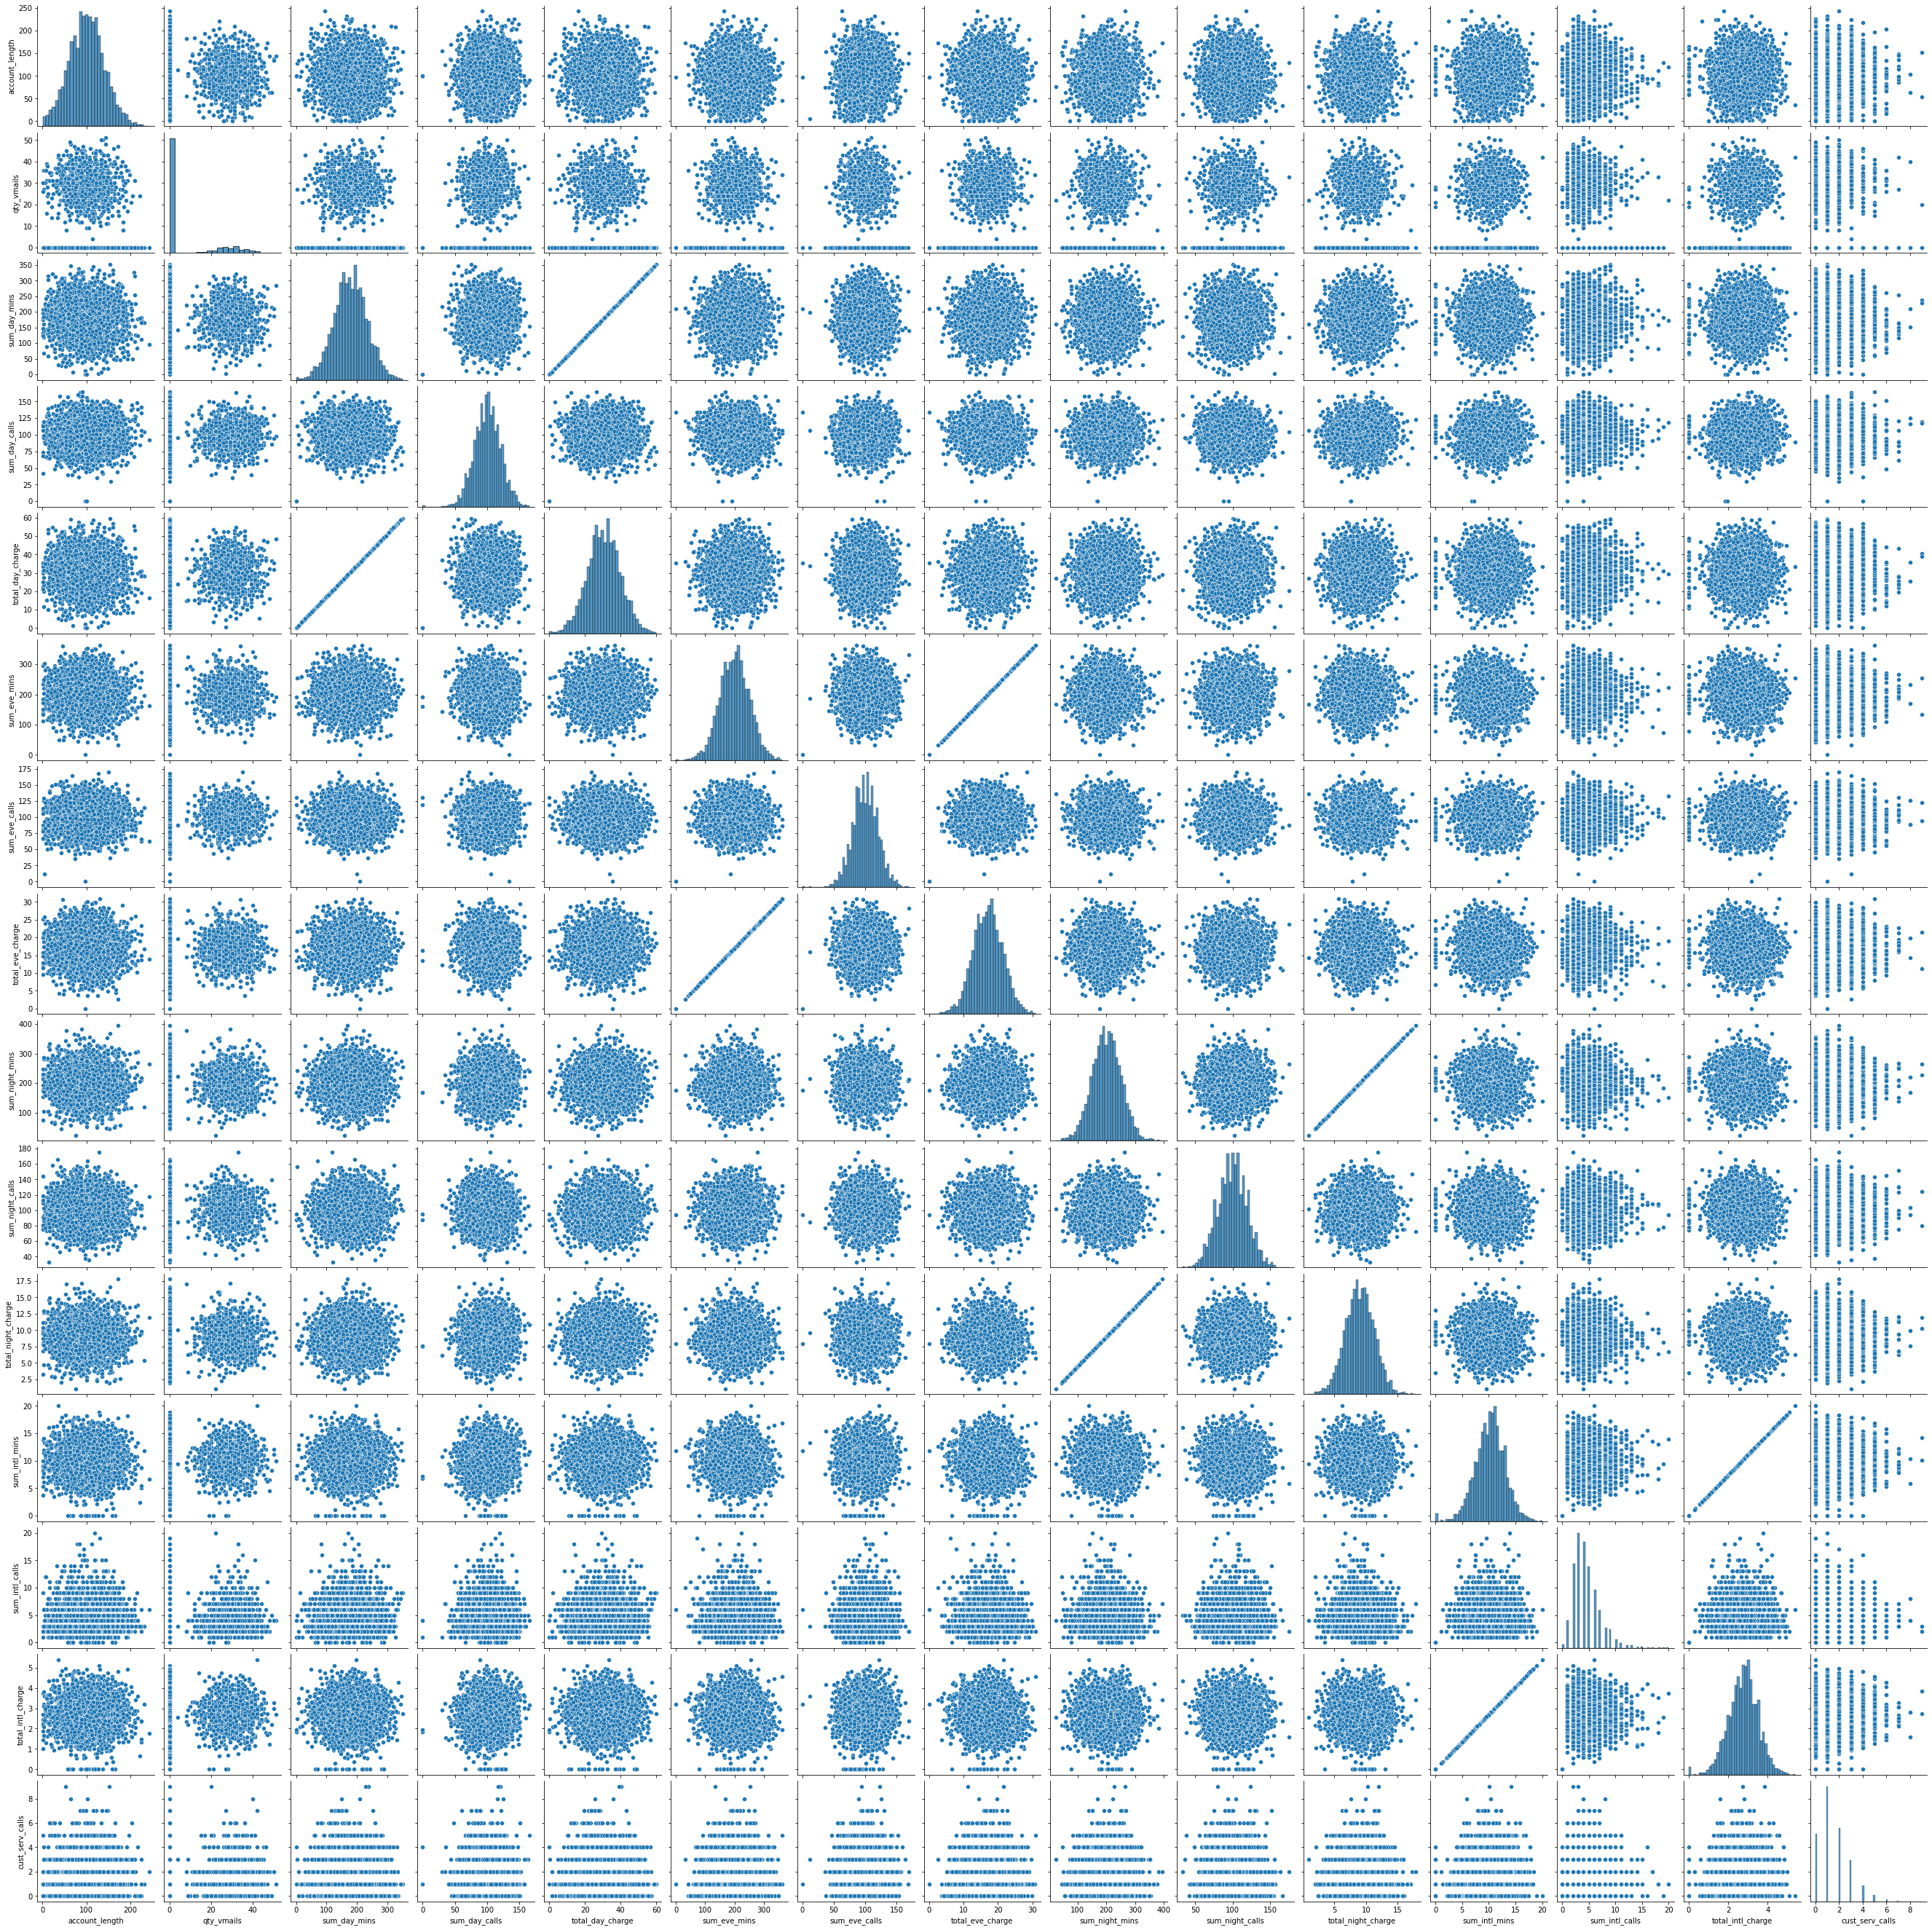

In [19]:
sns.pairplot(num_cols);

- these feature columns with numeric values when compared to the same feature generally have a normal distrubution except for `cust_serv_calls`, `sum_intl_calls`, `qty_vmails`.
- Displayed above you can see plots with a 45 degree angle. Columns such as `sum_intl_calls` & `total_intl_charge` are positively correlated so to move forward I decided to remove one of the pair of variables that lead to the 45 degree angle to create quality dataset.

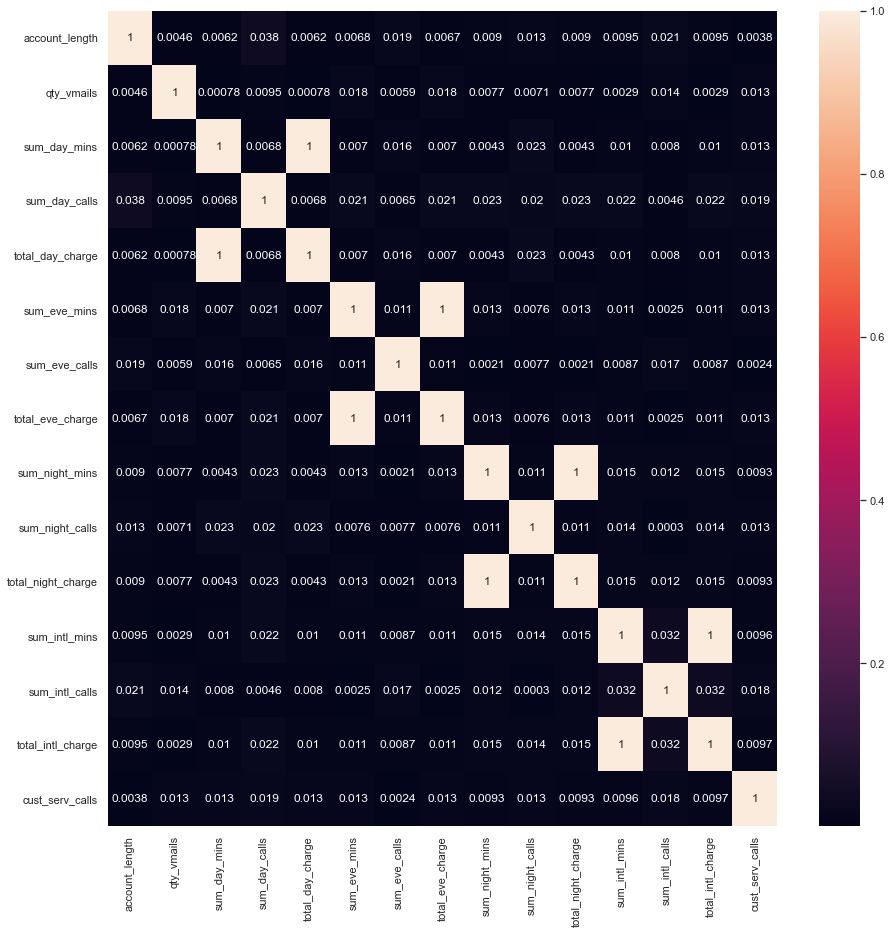

In [20]:
plt.figure(figsize = (15,15))
sns.set(style = "white")
sns.heatmap(num_cols.corr().abs(), annot = True)
plt.savefig("Intial_Heatmap")

Before running a model with this data, we need to select which variables we believe will be the best predictors. We can eliminate variables by looking at collinearity between variables and choosing to drop one of those variables. 

In [20]:
cc.drop(['total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge'], axis =1, inplace= True)
cc

state  account_length  qty_vmails  sum_day_mins  sum_day_calls  \
0       KS             128          25         265.1            110   
1       OH             107          26         161.6            123   
2       NJ             137           0         243.4            114   
3       OH              84           0         299.4             71   
4       OK              75           0         166.7            113   
...    ...             ...         ...           ...            ...   
3328    AZ             192          36         156.2             77   
3329    WV              68           0         231.1             57   
3330    RI              28           0         180.8            109   
3331    CT             184           0         213.8            105   
3332    TN              74          25         234.4            113   

      sum_eve_mins  sum_eve_calls  sum_night_mins  sum_night_calls  \
0            197.4             99           244.7               91   
1            195.5            103           254.4              103   
2            121.2            110           162.6              104   
3             61.9             88           196.9               89   
4            148.3            122           186.9              121   
...            ...            ...             ...              ...   
3328         215.5            126           279.1               83   
3329         153.4             55           191.3              123   
3330         288.8             58           191.9               91   
3331         159.6             84           139.2              137   
3332         265.9             82           241.4               77   

      sum_intl_mins  sum_intl_calls  cust_serv_calls  inter_plan2  \
0              10.0               3                1            0   
1              13.7               3                1            0   
2              12.2               5                0            0   
3               6.6               7                2            1   
4              10.1               3                3            1   
...             ...             ...              ...          ...   
3328            9.9               6                2            0   
3329            9.6               4                3            0   
3330           14.1               6                2            0   
3331            5.0              10                2            1   
3332           13.7               4                0            0   

      voicemail_plan2  churn_2  
0                   1        0  
1                   1        0  
2                   0        0  
3                   0        0  
4                   0        0  
...               ...      ...  
3328                1        0  
3329                0        0  
3330                0        0  
3331                0        0  
3332                1        0  

[3333 rows x 15 columns]

We removed the `'charge'` columns in this dataset since it is 100% correlated with it's counter opposite of `'charge.'`

In [21]:
num_cols2 = cc[['account_length', 'qty_vmails', 'sum_day_mins', 'sum_day_calls', 'sum_eve_mins', 'sum_eve_calls', 'sum_night_mins', 'sum_night_calls', 'sum_intl_mins', 'sum_intl_calls', 'cust_serv_calls']]
# we made a new variable for the numeric columns since there were columns removed

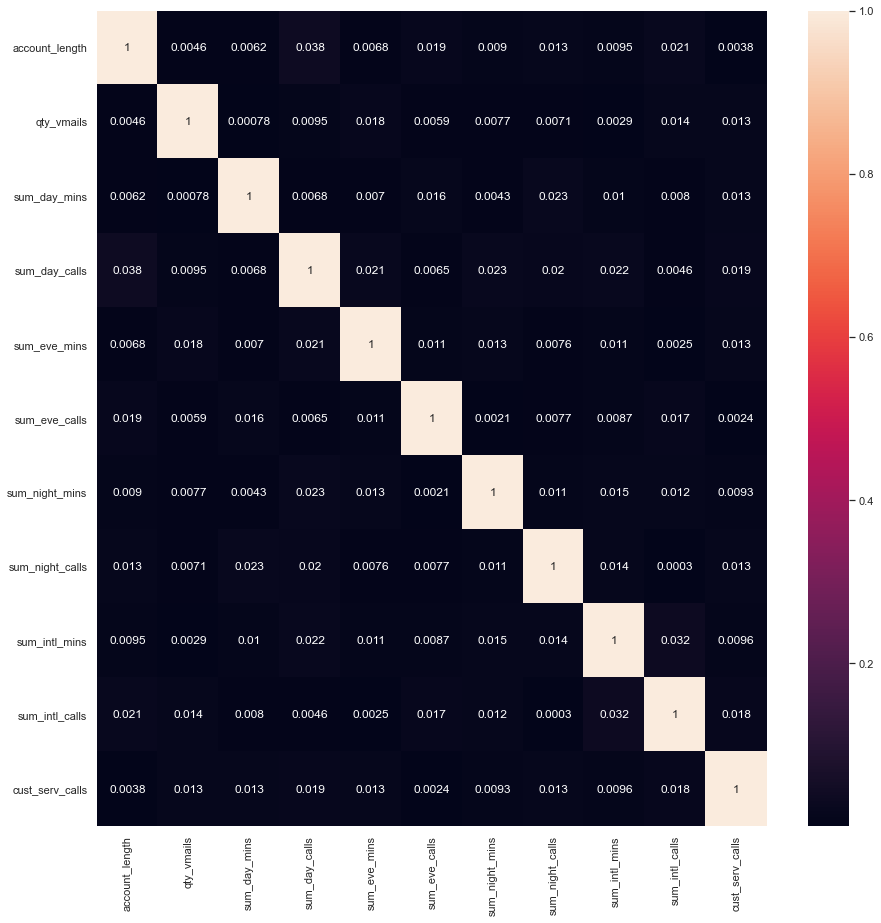

In [23]:
plt.figure(figsize = (15,15))
sns.set(style = "white")
sns.heatmap(num_cols2.corr().abs(), annot = True)
plt.savefig("Second_Heatmap")

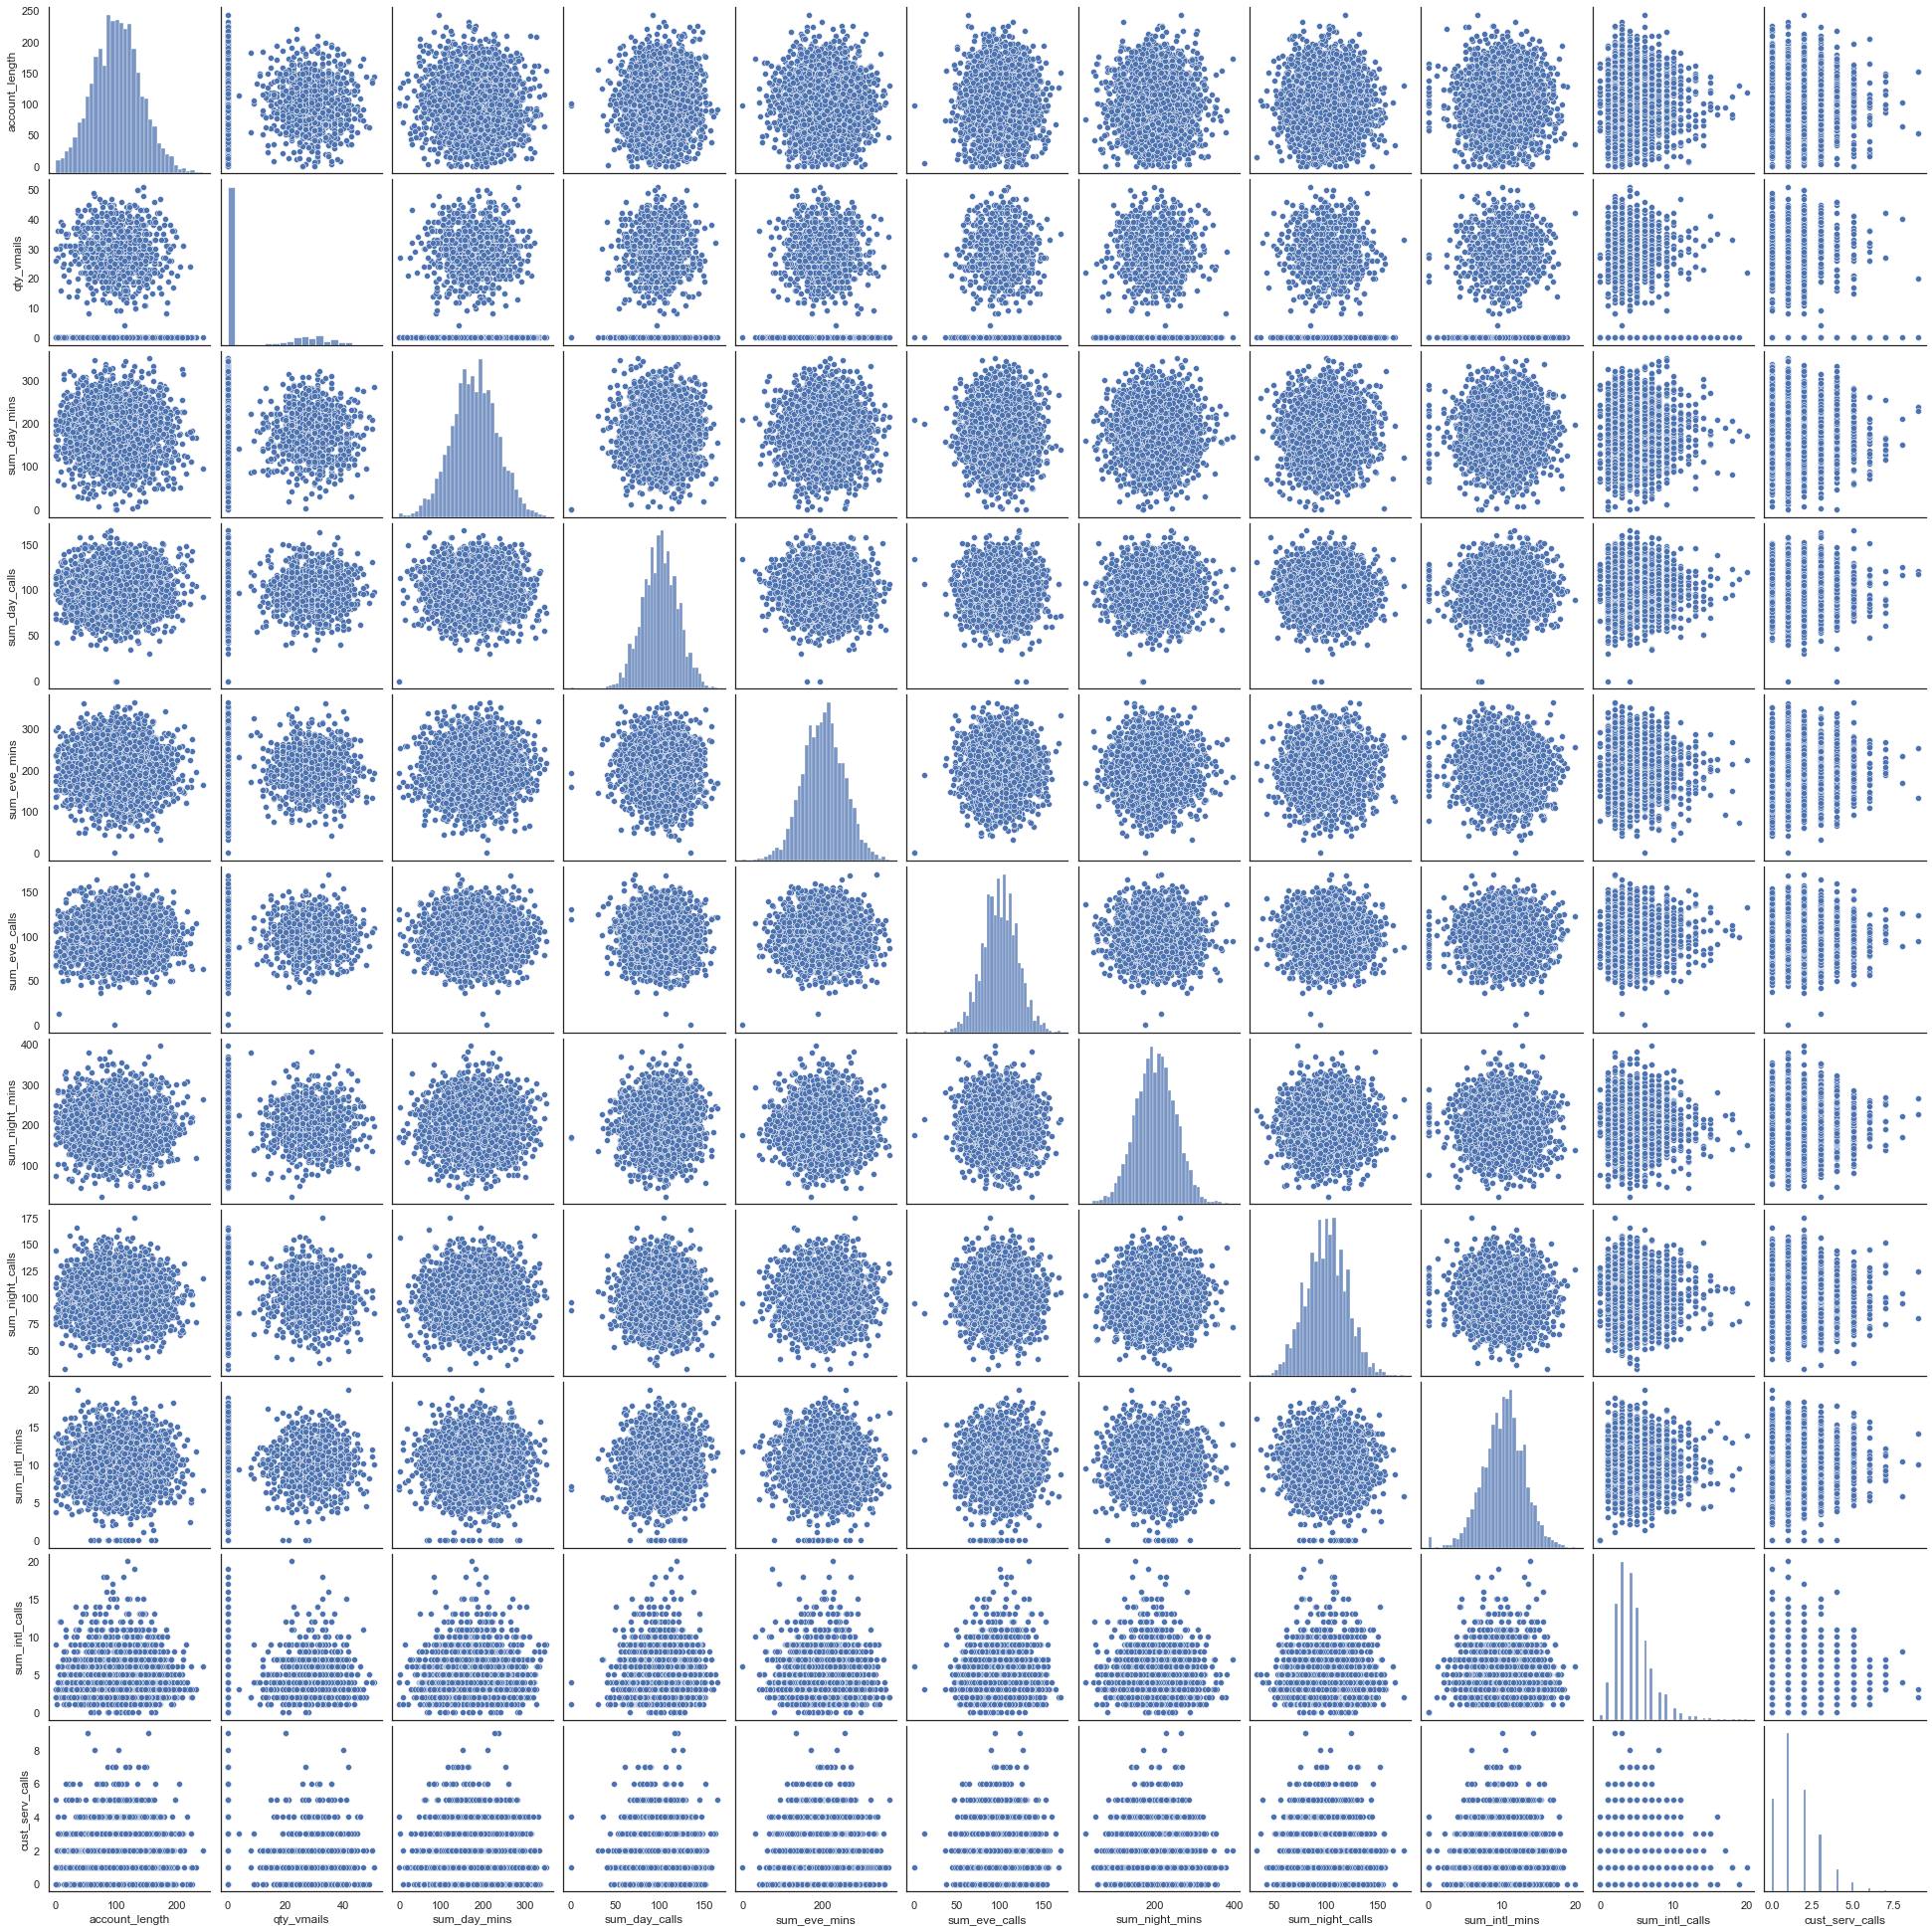

In [24]:
sns.pairplot(num_cols2);

/Users/jc/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


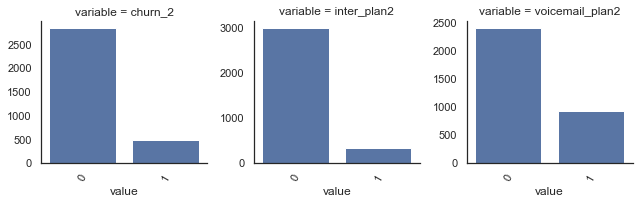

In [25]:
f = pd.melt(cc, value_vars=sorted(cat_columns))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g = g.map(sns.countplot, 'value')
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

This categorical data shows that most people did not utilize the international and the voicemail plan. 

# Model #1: Logistic Regression

In [22]:
ohe = OneHotEncoder(handle_unknown= "ignore")
#cc_encoded = pd.DataFrame(ohe.fit_transform(cc['state']).todense(), columns=ohe.get_feature_names())
# pd.DataFrame(ohe.fit_transform(cc['state’].reset_index()).todense(), columns=ohe.get_feature_names())
#cc_encoded = pd.DataFrame(ohe.fit_transform(pd.DataFrame(cc['state’])).todense(), columns=ohe.get_feature_names())
ohe.fit(pd.DataFrame(cc['state']))
col_names = ohe.categories_[0]

cc_encoded = pd.DataFrame(ohe.transform(pd.DataFrame(cc['state'])).todense(), columns=col_names)


cc_encoded

AK   AL   AR   AZ   CA   CO   CT   DC   DE   FL  ...   SD   TN   TX  \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
3328  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3329  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3330  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3331  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3332  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  1.0  0.0   

       UT   VA   VT   WA   WI   WV   WY  
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...   ...  ...  ...  ...  ...  ...  ...  
3328  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3329  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
3330  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3331  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3332  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[3333 rows x 51 columns]

In [23]:
cc.columns

Index(['state', 'account_length', 'qty_vmails', 'sum_day_mins',
       'sum_day_calls', 'sum_eve_mins', 'sum_eve_calls', 'sum_night_mins',
       'sum_night_calls', 'sum_intl_mins', 'sum_intl_calls', 'cust_serv_calls',
       'inter_plan2', 'voicemail_plan2', 'churn_2'],
      dtype='object')

In [24]:
#the variables were set up so so we can create a train/test split
X = cc.drop('churn_2', axis=1)
y = cc['churn_2']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#First model shall be logisitic regresison
logreg = LogisticRegression(fit_intercept=False, solver='liblinear')

# Drop previously encoded categorical columns
X_train_enc = X_train[["inter_plan2" ,"voicemail_plan2"]].reset_index().drop("index", axis =1)
X_test_enc = X_test[["inter_plan2" ,"voicemail_plan2"]].reset_index().drop("index", axis =1)
print(X_test_enc.shape)
print(X_train_enc.shape)

#the columns with numeric values were scaled
scaler = StandardScaler()
scaler.fit(X_train[num_cols2.columns])
X_train_num = pd.DataFrame(scaler.transform(X_train[num_cols2.columns]), columns=num_cols2.columns)
X_test_num = pd.DataFrame(scaler.transform(X_test[num_cols2.columns]), columns=num_cols2.columns)

#we run a one-hot encoding to turn 'state' column categorical data into 0 & 1 values
ohe = OneHotEncoder(handle_unknown= "ignore")
ohe.fit(pd.DataFrame(X_train['state']))

# we transform the train & test sets and input 'state' column information after one-hot encoding
cc_encoded_train = pd.DataFrame(ohe.transform(pd.DataFrame(X_train['state'])).todense(), columns = col_names)
cc_encoded_test = pd.DataFrame(ohe.transform(pd.DataFrame(X_test['state'])).todense(), columns = col_names)
print(cc_encoded_train.shape)
print(cc_encoded_test.shape)

# we concat the dataframes to include the numeric, state values (one-hot encoded), and categorical columns
X_train =pd.concat([X_train_num, cc_encoded_train, X_train_enc], axis =1)
X_test = pd.concat([X_test_num, cc_encoded_test,X_test_enc], axis =1)

print(X_train.shape)
print(X_test.shape)


(667, 2)
(2666, 2)
(2666, 51)
(667, 51)
(2666, 64)
(667, 64)


In [25]:
X_train

account_length  qty_vmails  sum_day_mins  sum_day_calls  sum_eve_mins  \
0           3.601382   -0.584936     -1.547653      -0.429657     -0.729987   
1           0.184951   -0.584936     -1.244014       0.224176     -0.138082   
2          -0.650176   -0.584936      0.787609      -1.133785      2.491952   
3           1.020079   -0.584936     -0.969818      -0.127888     -0.408385   
4          -0.371801   -0.584936      0.675354      -0.228477      1.294330   
...              ...         ...           ...            ...           ...   
2661        0.134337   -0.584936      1.744532       0.978599     -0.041404   
2662        0.539248   -0.584936     -2.659156      -1.938502     -0.392601   
2663       -0.877938   -0.584936     -1.693032      -1.234374      1.209490   
2664        1.728672   -0.584936     -0.007374       0.525945     -0.503090   
2665       -1.637145    2.566481     -2.754849       1.129483     -1.412651   

      sum_eve_calls  sum_night_mins  sum_night_calls  sum_intl_mins  \
0         -1.840891        1.255804         0.925634      -1.300791   
1          0.499864        0.165090        -0.353704      -2.194793   
2          0.549667        0.147339         0.209205      -0.549828   
3         -1.890695       -1.178086         1.437368      -0.800149   
4         -1.143645        0.265680         0.516246      -2.051753   
...             ...             ...              ...            ...   
2661      -0.894629       -0.783614        -1.940082      -1.515351   
2662      -0.546006        1.007287        -2.144776       0.880576   
2663       0.549667       -0.314193         1.283848      -0.371028   
2664       1.495930        0.553644        -0.404877      -0.120707   
2665       0.848487        2.472748         0.260378      -0.585588   

      sum_intl_calls  ...   TX   UT   VA   VT   WA   WI   WV   WY  \
0           0.634849  ...  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
1          -0.184370  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2           1.863677  ...  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3          -1.003589  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4          -0.593980  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...              ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
2661       -0.593980  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2662       -1.003589  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2663        0.225239  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2664        0.634849  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2665        0.634849  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

      inter_plan2  voicemail_plan2  
0               0                0  
1               0                0  
2               1                0  
3               0                0  
4               0                0  
...           ...              ...  
2661            0                0  
2662            0                0  
2663            0                0  
2664            0                0  
2665            0                1  

[2666 rows x 64 columns]

In [26]:
cc

state  account_length  qty_vmails  sum_day_mins  sum_day_calls  \
0       KS             128          25         265.1            110   
1       OH             107          26         161.6            123   
2       NJ             137           0         243.4            114   
3       OH              84           0         299.4             71   
4       OK              75           0         166.7            113   
...    ...             ...         ...           ...            ...   
3328    AZ             192          36         156.2             77   
3329    WV              68           0         231.1             57   
3330    RI              28           0         180.8            109   
3331    CT             184           0         213.8            105   
3332    TN              74          25         234.4            113   

      sum_eve_mins  sum_eve_calls  sum_night_mins  sum_night_calls  \
0            197.4             99           244.7               91   
1            195.5            103           254.4              103   
2            121.2            110           162.6              104   
3             61.9             88           196.9               89   
4            148.3            122           186.9              121   
...            ...            ...             ...              ...   
3328         215.5            126           279.1               83   
3329         153.4             55           191.3              123   
3330         288.8             58           191.9               91   
3331         159.6             84           139.2              137   
3332         265.9             82           241.4               77   

      sum_intl_mins  sum_intl_calls  cust_serv_calls  inter_plan2  \
0              10.0               3                1            0   
1              13.7               3                1            0   
2              12.2               5                0            0   
3               6.6               7                2            1   
4              10.1               3                3            1   
...             ...             ...              ...          ...   
3328            9.9               6                2            0   
3329            9.6               4                3            0   
3330           14.1               6                2            0   
3331            5.0              10                2            1   
3332           13.7               4                0            0   

      voicemail_plan2  churn_2  
0                   1        0  
1                   1        0  
2                   0        0  
3                   0        0  
4                   0        0  
...               ...      ...  
3328                1        0  
3329                0        0  
3330                0        0  
3331                0        0  
3332                1        0  

[3333 rows x 15 columns]

In [27]:
print(X_train.isna().sum().sum())
print(X_test.isna().sum().sum())

0
0


# Seeking a Model to Maximize Recall:
Having a false negative (Type II Error) means our model is predicting that the customer isn't going to cancel but they really are. Our priority is given to the **metric of recall**.

AUC: 0.831700661232201


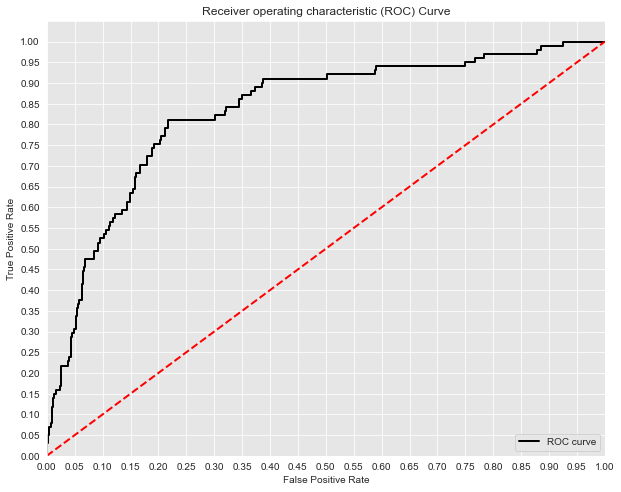

In [28]:
# Probability scores for test set
y_score = logreg.fit(X_train, y_train).decision_function(X_test)

# False positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

# Print AUC
print('AUC: {}'.format(auc(fpr, tpr)))

# Plot the ROC curve
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color = 'black',
         lw=lw, label='ROC curve')
plt.plot([0,1], [0,1], color = 'red', lw=lw, linestyle ='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [29]:
model1 = logreg.fit(X_train, y_train)
model1.score(X_test, y_test)

0.8590704647676162

In [30]:
y_pred = model1.predict(X_test)

In [31]:
accuracy_score(y_test, y_pred)

0.8590704647676162

In [32]:
print(confusion_matrix(y_test, y_pred))

[[551  15]
 [ 79  22]]


In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       566
           1       0.59      0.22      0.32       101

    accuracy                           0.86       667
   macro avg       0.73      0.60      0.62       667
weighted avg       0.83      0.86      0.83       667



# Model #2: K-Nearest Neighbors Model


In [34]:
model2 = KNeighborsClassifier()
model2.fit(X_train, y_train)
test_preds = model2.predict(X_test)

In [35]:
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, test_preds)

Precision Score: 0.9629629629629629
Recall Score: 0.25742574257425743
Accuracy Score: 0.8860569715142429
F1 Score: 0.40625


In [36]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        recall = recall_score(y_test, preds)
        if recall > best_score:
            best_k = k
            best_score = recall
    
    print("Best Value for k: {}".format(best_k))
    print("Recall: {}".format(best_score))

# Lets Evaluate K-Nearest Neighbors

In [37]:
find_best_k(X_train, y_train, X_test, y_test)

Best Value for k: 1
Recall: 0.42574257425742573


In [38]:
print(confusion_matrix(y_test, y_pred))

[[551  15]
 [ 79  22]]


# Model 3: Decision Tree Classifier

In [39]:
dt = DecisionTreeClassifier(criterion='entropy', random_state=1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [40]:
# Predictions on test set 
y_pred = dt.predict(X_test)

# Check the AUC of predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8416016513312109

In [41]:
recall_score(y_test, y_pred)

0.7326732673267327

In [46]:
y_test.head()

438     0
2674    0
1345    1
1957    0
2148    0
Name: churn_2, dtype: int64

In [45]:
test_preds = dt.predict(X_test)

#training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)
#train_recall = recall_score(y_train, training_preds)
test_recall = recall_score(y_test, test_preds)

#print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))
#print('Training Recall: {:.4}%'.format(train_recall * 100))
print('Test Recall: {:.4}%'.format(test_recall * 100))

Validation accuracy: 91.75%
Test Recall: 73.27%


In [90]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       566
           1       0.73      0.73      0.73       101

    accuracy                           0.92       667
   macro avg       0.84      0.84      0.84       667
weighted avg       0.92      0.92      0.92       667



So far out of our 3 test, Decision Tree has the best recall rate. Logistic regression has the lowest. Let's test 2 more!

In [91]:
print(confusion_matrix(y_test, y_pred))

[[538  28]
 [ 27  74]]


*Decision Tree using default settings*

In [92]:
dt = DecisionTreeClassifier(criterion='entropy',
                           max_features=6,
                           max_depth=3,
                           min_samples_split=0.7,
                           min_samples_leaf=0.25, 
                           random_state= 1)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5

In [93]:
recall_score(y_test, y_pred)

0.0

When using the baseline decision tree 1st, I received a ~73% recall then when changing the settings. For this reason, I shall use the 1st decision tree model.

In [94]:
print(confusion_matrix(y_test, y_pred))

[[566   0]
 [101   0]]


# Model 4: Random Tree Classifier

In [95]:
model4 = RandomForestClassifier(n_estimators=20, max_depth=8)
model4.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=20)

In [96]:
# Make predictions using test set 
y_pred = model4.predict(X_test)

In [97]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[566   0]
 [ 82  19]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       566
           1       1.00      0.19      0.32       101

    accuracy                           0.88       667
   macro avg       0.94      0.59      0.62       667
weighted avg       0.89      0.88      0.84       667



In [98]:
model4.score(X_train, y_train)

0.9186046511627907

In [99]:
model4.score(X_test, y_test)

0.8770614692653673

## Model 5: XGBoost Model

In [100]:
m5 = XGBClassifier(random_state = 1)

m5.fit(X_train, y_train)

training_preds = m5.predict(X_train)
test_preds = m5.predict(X_test)

training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)
train_recall = recall_score(y_train, training_preds)
test_recall = recall_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))
print('Training Recall: {:.4}%'.format(train_recall * 100))
print('Test Recall: {:.4}%'.format(test_recall * 100))

Training Accuracy: 100.0%
Validation accuracy: 95.95%
Training Recall: 100.0%
Test Recall: 79.21%


In [101]:
print(confusion_matrix(y_test, y_pred))

[[566   0]
 [ 82  19]]


### LETS TUNE XGBOOST!

In [102]:
param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}

In [103]:
grid_m5 = GridSearchCV(m5, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_m5.fit(X_train, y_train)

best_parameters = grid_m5.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_m5.predict(X_train)
test_preds = grid_m5.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)
train_recall = recall_score(y_train, training_preds)
test_recall = recall_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))
print('Training Recall: {:.4}%'.format(train_recall * 100))
print('Test Recall: {:.4}%'.format(test_recall * 100))

Grid Search found the following optimal parameters: 
learning_rate: 0.1
max_depth: 6
min_child_weight: 1
n_estimators: 100
subsample: 0.7

Training Accuracy: 98.65%
Validation accuracy: 95.2%
Training Recall: 90.58%
Test Recall: 72.28%


In [104]:
print(confusion_matrix(y_test, y_pred))

[[566   0]
 [ 82  19]]


### XGBoost Using Optimal Parameters

In [105]:
m5 = XGBClassifier(max_depth = 6, learning_rate = .1, n_estimators = 100, min_child_weight = 1, subsample = .7, random_state = 1)

m5.fit(X_train, y_train)

training_preds = m5.predict(X_train)
test_preds = m5.predict(X_test)

training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)
train_recall = recall_score(y_train, training_preds)
test_recall = recall_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))
print('Training Recall: {:.4}%'.format(train_recall * 100))
print('Test Recall: {:.4}%'.format(test_recall * 100))

Training Accuracy: 98.65%
Validation accuracy: 95.2%
Training Recall: 90.58%
Test Recall: 72.28%


**Lets run a confusion matrix to see how this predicts.**


In [106]:
print(confusion_matrix(y_test, y_pred))

[[566   0]
 [ 82  19]]


Our baseline **XGBoost** model performed better than the altered model with the optimal parameteres.

In [107]:
m5.feature_importances_

array([0.02513906, 0.07724594, 0.07891652, 0.02777106, 0.05378597,
       0.0254239 , 0.03547523, 0.02857408, 0.05298911, 0.0792684 ,
       0.10584022, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.02836159, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.02932714,
       0.        , 0.01428968, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.02487814, 0.        , 0.        ,
       0.        , 0.01513423, 0.02529076, 0.        , 0.        ,
       0.03338965, 0.        , 0.0420922 , 0.        , 0.        ,
       0.        , 0.0211458 , 0.        , 0.        , 0.        ,
       0.        , 0.03185741, 0.        , 0.        , 0.03334809,
       0.        , 0.        , 0.02114533, 0.        , 0.        ,
       0.        , 0.        , 0.08931047, 0.        ], dtype=float32)

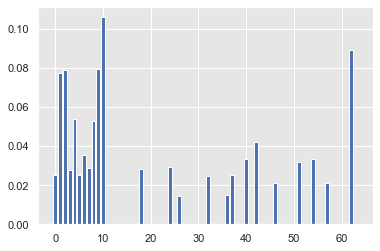

In [108]:
plt.bar(range(len(m5.feature_importances_)), m5.feature_importances_)
plt.show()


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

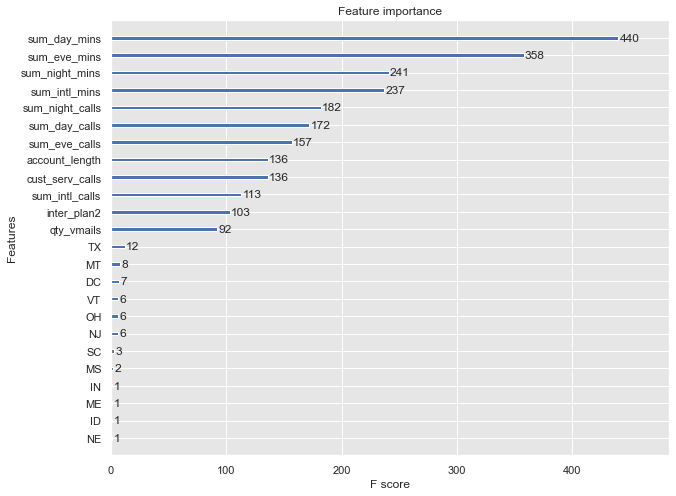

In [109]:
fig, ax = plt.subplots(figsize=(10,8))
plot_importance(m5, ax=ax)
# y_labels = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
# ax.set_yticklabels(x_labels);

## Recommendations

- Create dataset per **state** to allow data analyst to see what he/she can do to improve churn per state.
- Explore the impact of **monthly/annual charge for minutes used & the total monthly/annual charge**. This may be useful to find an **optimal charge per minute** compared to competitors prices to see if this decreases churn rate.


### Top Features to Include in Tuning

The top 10 features on what we see from **Feature Importances** are all columns numeric values were included and `international plan`. `State` did not seem to be a huge feature importance.


**All columns with numeric values showed to have the most impact on churn rate.**

**Numeric information:
- Sum of minutes used (day/eve/night)
- Total charge (day/eve/night)
- Number of voicemails
- Account length

# Sources

- *Biswas, Sushman. “5-Step Guide to Building a Churn Prediction Model.” Width.ai, 10 Nov. 2021, https://www.width.ai/post/churn-prediction-model.* 